In [ ]:
# This program simulates bacterial chemotaxis in a constant concentration of attractants c_0.
# The output of this program is a plot of the average running time as a function of counting noise for the small noise regime
# and a plot of the drift speed as a function of counting noise for the large noise regime.
# The response function is taken to be a DELTA KERNEL.
# Counting noise is implemented by adding an effective white noise to the concentration.
# All bacteria start at position = 0 and time = 0, which is the time of last tumbling.
# We record the time duration of one run for all bacteria to determine
# the average running time given a concentration.
# The drift speed is approximated using the average running times in two different concentrations.
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from scipy import special

In [ ]:
tau = 1         # average running time if c = 0 in seconds
dt = 0.01       # time step of simulations in seconds
c_0 = 0.5       # average concentration (unitless)
sigma = 0.01    # the noise amplitude (unitless)
N_s = 1000      # number of trajectories simulated
binwidth = 1    # binwidth of histograms
v_0 = 1         # running speed in micro m/s

In [ ]:
# Define Gaussian noise with the noise amplitude as input
def noise(sigma):
   gaussian_n = np.random.normal(0, sigma)
   return gaussian_n

In [ ]:
# Calculating the average running time using the Walking algorithm
def t_run_average(sigma, c_0):
    t_end = []

    # for N_s bacteria one run is simulated
    for s in range(0, N_s):
        x = 0             # the amount of times the bacteria has tumbled since t = 0
        t = 0

        # While the bacteria is running
        while x<1:
            # Pick a random number uniformly distributed between 0 and 1.
            i = random.uniform(0,1)
            # Calculate the tumble probability
            P_tumble = 1/tau *((1- c_0 )*dt - noise(sigma)* (dt)**(0.5))

            # If the random number is smaller than the tumble probability, the bacteria tumbles.
            # Save the running time and update x.
            if i<P_tumble:
                t_end.append(t)
                x = 1
            # Update the time
            t = t+dt
    # Take the average to find the average running time
    t_average = np.mean(t_end)
    t_error = 2*np.std(t_end)/math.sqrt(N_s)
    return t_average, t_error

In [ ]:
# Calculating the average running time using the Gillespie algorithm
def t_run_average_2(sigma, c_0):
    t_end = []

    # for N_s bacteria one run is simulated
    for s in range(0, N_s):
        x = 0
        t=0
        i = random.uniform(0,1)
        # Obtain a random number distributed by a logarithm. This will be compared to the integral of tumble probabilities.
        integral_random = np.log(1/i)
        integral_P_tumble = 0           # the integral of all past tumble probabilities.

        # While the bacteria is running
        while x<1:
            # Calculate the tumble probability and the integrall of all tumble probabilities till now.
            P_tumble = 1/tau *((1- c_0 )*dt + noise(sigma)* (dt)**(0.5))
            integral_P_tumble = integral_P_tumble + P_tumble

            # If the random number is smaller than the integral of tumble probabilities, the bacteria tumbles.
            # Save the running time and update x.
            if integral_random < integral_P_tumble:
                t_end.append(t)
                x = 1
            t= t+dt
    t_average = np.mean(t_end)
    t_error = 2*np.std(t_end)/math.sqrt(N_s)
    return t_average, t_error

In [ ]:
# Calculating the average running time using the Walking algorithm as done above but disregarding negative P_tumble.
def t_run_average_cut(sigma, c_0):
    t_end = []
    for s in range(0, N_s):
        x = 0
        t = 0
        while x<1:
            i = random.uniform(0,1)
            P_tumble = 1/tau *((1- c_0 )*dt - noise(sigma)* (dt)**(0.5) )
            # Only tumble if the tumble probability is positive and the random number is smaller than the tumble probability.
            if P_tumble > 0 and i<P_tumble:
                t_end.append(t)
                x = 1
            # Only update time if the tumble proability is positive
            if P_tumble >0:
                t = t+dt
    t_average = np.mean(t_end)
    t_error = 2*np.std(t_end)/math.sqrt(N_s)
    return t_average, t_error

In [ ]:
# Calculating the average running time using the Walking algorithm as done above but disregarding negative P_tumble.
def t_run_average_cut_2(sigma, c_0):
    t_end = []
    for s in range(0, N_s):
        x = 0
        t=0
        i = random.uniform(0,1)
        integral_random = np.log(1/i)
        integral_P_tumble = 0
        while x<1:
            P_tumble = 1/tau *((1- c_0 )*dt + noise(sigma)* (dt)**(0.5))
            if P_tumble >0:
                integral_P_tumble = integral_P_tumble + P_tumble
                # Only tumble if the tumble probability is positive and the random number is smaller than the integral of tumble probabilities.
                if integral_random < integral_P_tumble:
                    t_end.append(t)
                    x = 1
                # Only update time if the tumble proability is positive
                t= t+dt
    t_average = np.mean(t_end)
    t_error = 2*np.std(t_end)/math.sqrt(N_s)
    return t_average,  t_error

In [ ]:
# Obtain the average running time for different counting noise in the small noise regime.
# Use the Walking algorithm and the Gillespie algormithm as given by the first two functions.
list_t_1 = []
list_t_2 = []
list_sigma = []
list_error_1 = []
list_error_2 = []
for i in np.arange(0, 0.01, 0.001):
    sigma = i
    list_sigma.append(sigma)
    t_1, t_1_error = t_run_average(sigma, c_0)
    t_2, t_2_error = t_run_average_2(sigma, c_0)
    list_t_1.append(t_1)
    list_error_1.append(t_1_error)
    list_t_2.append(t_2)
    list_error_2.append(t_2_error)

In [ ]:
# Plot the average running time for different counting noise in the small noise regime.
plt.errorbar(list_sigma, list_t_1, yerr=list_error_1, label = 'Walking')
plt.errorbar(list_sigma, list_t_2, yerr=list_error_2, label = 'Gillespie')
plt.xlabel('$\sigma_w$')
plt.ylabel('$\overline{ t_{run}}$')
plt.ylim(bottom=0, top = 2.5)
plt.legend()
plt.show()

In [ ]:
# Obtain the average running time for different counting noise in the large noise regime, disregarding negative tumble probabilities.
# Use the Walking algorithm and the Gillespie algormithm as given by the second two functions.
list_t_1 = []
list_t_2 = []
list_sigma = []
list_error_1 = []
list_error_2 = []
for i in np.arange(0, 0.01, 0.001):
    sigma = i
    list_sigma.append(sigma)
    t_1, t_1_error = t_run_average_cut(sigma, c_0)
    t_2, t_2_error = t_run_average_cut_2(sigma, c_0)
    list_t_1.append(t_1)
    list_error_1.append(t_1_error)
    list_t_2.append(t_2)
    list_error_2.append(t_2_error)

In [ ]:
# Define the theoretical prediction of the average running times as a function of the counting noise
def theory(s):
  b = (1-c_0)/tau
  y = 1/ (b + math.sqrt(2/(math.pi*dt))*s/tau  )
  return y
###FACTORS DUE TO NORMALIZING?!!!!

In [ ]:
# Create a list of average running times for different counting noise, using the theoretical prediction.
list_s = []
list_t =[]
for s in np.arange(0.05, 0.25, 0.01):
  t = theory(s)
  list_s.append(s)
  list_t.append(t)

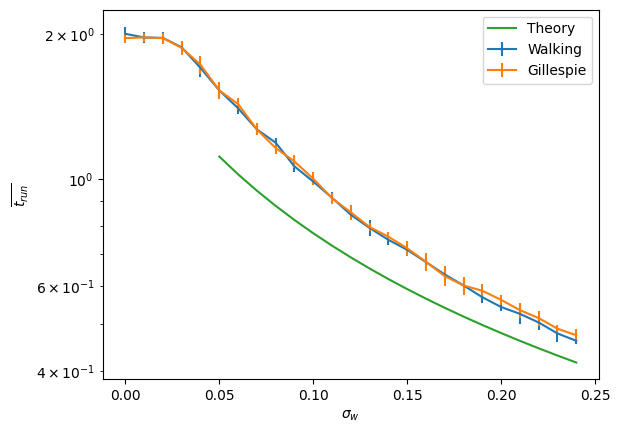

In [ ]:
# Plot the average running time for different counting noise in the large noise regime, disregarding negative tumble probabilities,
# and including the theoretical predictions.
plt.errorbar(list_sigma, list_t_1, yerr=list_error_1, label = 'Walking')
plt.errorbar(list_sigma, list_t_2, yerr=list_error_2, label = 'Gillespie')
plt.plot(list_s, np.array(list_t)*1, label = 'Theory')
plt.xlabel('$\sigma_w$')
plt.ylabel('$\overline{ t_{run}}$')
plt.yscale('log')
plt.legend()
plt.show()

In [ ]:
# Obtain the average running time as a function of different counting noise for two different concentrations c_0 (0.5 and 0.7)
# Use the Walking algorithm, disregarding negative tumble probabilities as we assume large noise regime.
list_t_1 = []
list_t_2 = []
list_sigma = []
list_error_1 = []
list_error_2 = []
for i in np.arange(0, 0.01, 0.001):
    sigma = i
    list_sigma.append(sigma)
    t_1, t_1_error = t_run_average_cut(sigma, 0.7)
    t_2, t_2_error = t_run_average_cut(sigma, 0.5)
    list_t_1.append(t_1)
    list_error_1.append(t_1_error)
    list_t_2.append(t_2)
    list_error_2.append(t_2_error)

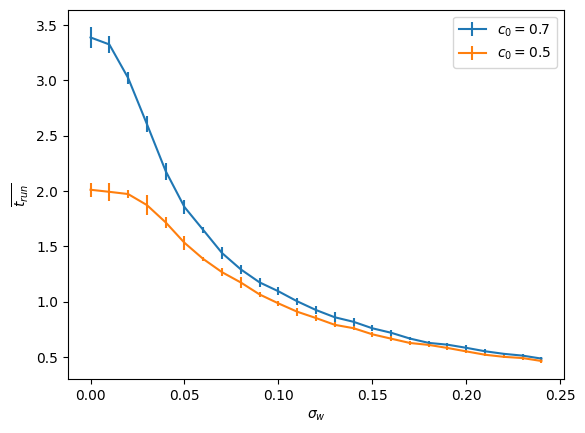

In [ ]:
# Plot the average running time as a function of different counting noise for two different concentrations,
# disregarding negative tumble probabilities as we assume large noise regime.
plt.errorbar(list_sigma, list_t_1, yerr=list_error_1, label = '$c_0 = 0.7$')
plt.errorbar(list_sigma, list_t_2, yerr=list_error_2, label = '$c_0 = 0.5$')
plt.xlabel('$\sigma_w$')
plt.ylabel('$\overline{ t_{run}}$')
plt.legend()
plt.show()

In [ ]:
# Define the theoretical prediction of the drift speed as a function of the counting noise
# For this prediction we use c_0 = 0.6 and delta_c = 0.1.
def v_drift(sigma):
  delta_c = 0.1
  v_pred = (2* delta_c) *v_0* math.pi * dt * tau/(4* sigma**2)
  return v_pred

In [ ]:
# Create a list of drift speeds for different counting noise, using the theoretical prediction.
list_s = []
list_v_theory =[]
for s in np.arange(0.05, 0.25, 0.01):
  v = v_drift(s)
  list_s.append(s)
  list_v_theory.append(v)

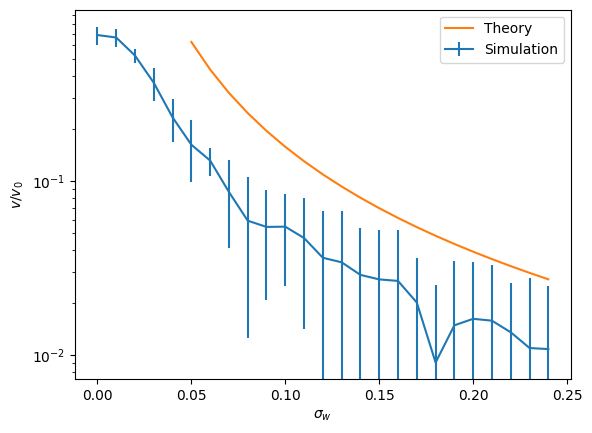

In [ ]:
# Plot the average running time for different counting noise in the large noise regime, disregarding negative tumble probabilities,
# and including the theoretical predictions.
list_v = v_0 /(2 *tau)* (np.array(list_t_1) - np.array(list_t_2))
list_error =  v_0 /(2 *tau)* (np.array(list_error_2) + np.array(list_error_1))
plt.errorbar(list_sigma, list_v, yerr= list_error, label = 'Simulation')
plt.plot(list_s, list_v_theory, label = 'Theory')
plt.xlabel('$\sigma_w$')
plt.ylabel('$v/v_0$')
plt.legend()
plt.yscale('log')
plt.show()